## Problem Statement

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
#### A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
* pos - the position of the player
* g - number of games the player was in
* gs - number of games the player started
* pts - total points the player scored


There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.

#### We can read our dataset in and figure out which columns are present:

In [1]:
import pandas
with open("C:\\Users\\Shoaib\\Desktop\\ML Course Online\\nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


#### Describing the data:

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

`Observations:`

* There are 5 float columns, 22 integer columns and 4 categorical columns
* There are some columns with null values (x2p, ft, fg, x3p etc)

So, let's confirm about null values:

In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

There are four columns with null values:

* fg. - float dtype
* x3p - float dtype
* x2p - float dtype
* efg - float dtype
* ft. - float dtype

#### Imputing values:

In [7]:
# fg.column:

fg_mean = nba['fg.'].mean()
fg_std = nba['fg.'].std()
fg_value = []

for i in range(nba['fg.'].isnull().sum()):
    x = np.random.uniform(fg_mean - fg_std, fg_mean + fg_std)
    fg_value.append(x)
    
nba.loc[np.isnan(nba['fg.']), 'fg.'] = fg_value

In [8]:
nba['fg.'].isnull().sum()

0

In [9]:
# x3p column:

x3p_mean = nba['x3p.'].mean()
x3p_std = nba['x3p.'].std()
x3p_value = []

for i in range(nba['x3p.'].isnull().sum()):
    x = np.random.uniform(x3p_mean - x3p_std, x3p_mean + x3p_std)
    x3p_value.append(x)
    
nba.loc[np.isnan(nba['x3p.']), 'x3p.'] = x3p_value

In [10]:
nba['x3p.'].isnull().sum()

0

In [11]:
# x3p column:

x2p_mean = nba['x2p.'].mean()
x2p_std = nba['x2p.'].std()
x2p_value = []

for i in range(nba['x2p.'].isnull().sum()):
    x = np.random.uniform(x2p_mean - x2p_std, x2p_mean + x2p_std)
    x2p_value.append(x)
    
nba.loc[np.isnan(nba['x2p.']), 'x2p.'] = x2p_value

In [12]:
nba['x2p.'].isnull().sum()

0

In [13]:
# efg.column:

efg_mean = nba['efg.'].mean()
efg_std = nba['efg.'].std()
efg_value = []

for i in range(nba['efg.'].isnull().sum()):
    x = np.random.uniform(efg_mean - efg_std, efg_mean + efg_std)
    efg_value.append(x)
    
nba.loc[np.isnan(nba['efg.']), 'efg.'] = efg_value

In [14]:
nba['efg.'].isnull().sum()

0

In [15]:
# ft.column:

ft_mean = nba['ft.'].mean()
ft_std = nba['ft.'].std()
ft_value = []

for i in range(nba['ft.'].isnull().sum()):
    x = np.random.uniform(ft_mean - ft_std, ft_mean + ft_std)
    ft_value.append(x)
    
nba.loc[np.isnan(nba['ft.']), 'ft.'] = ft_value

In [16]:
nba['ft.'].isnull().sum()

0

In [17]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

Great, there're no null values now.
Let's explore data more !!

#### Data Exploration:

In [18]:
categorical_col = []
for col in nba.columns:
    if nba[col].dtype == 'O':
        categorical_col.append(col)

categorical_col

['player', 'pos', 'bref_team_id', 'season']

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


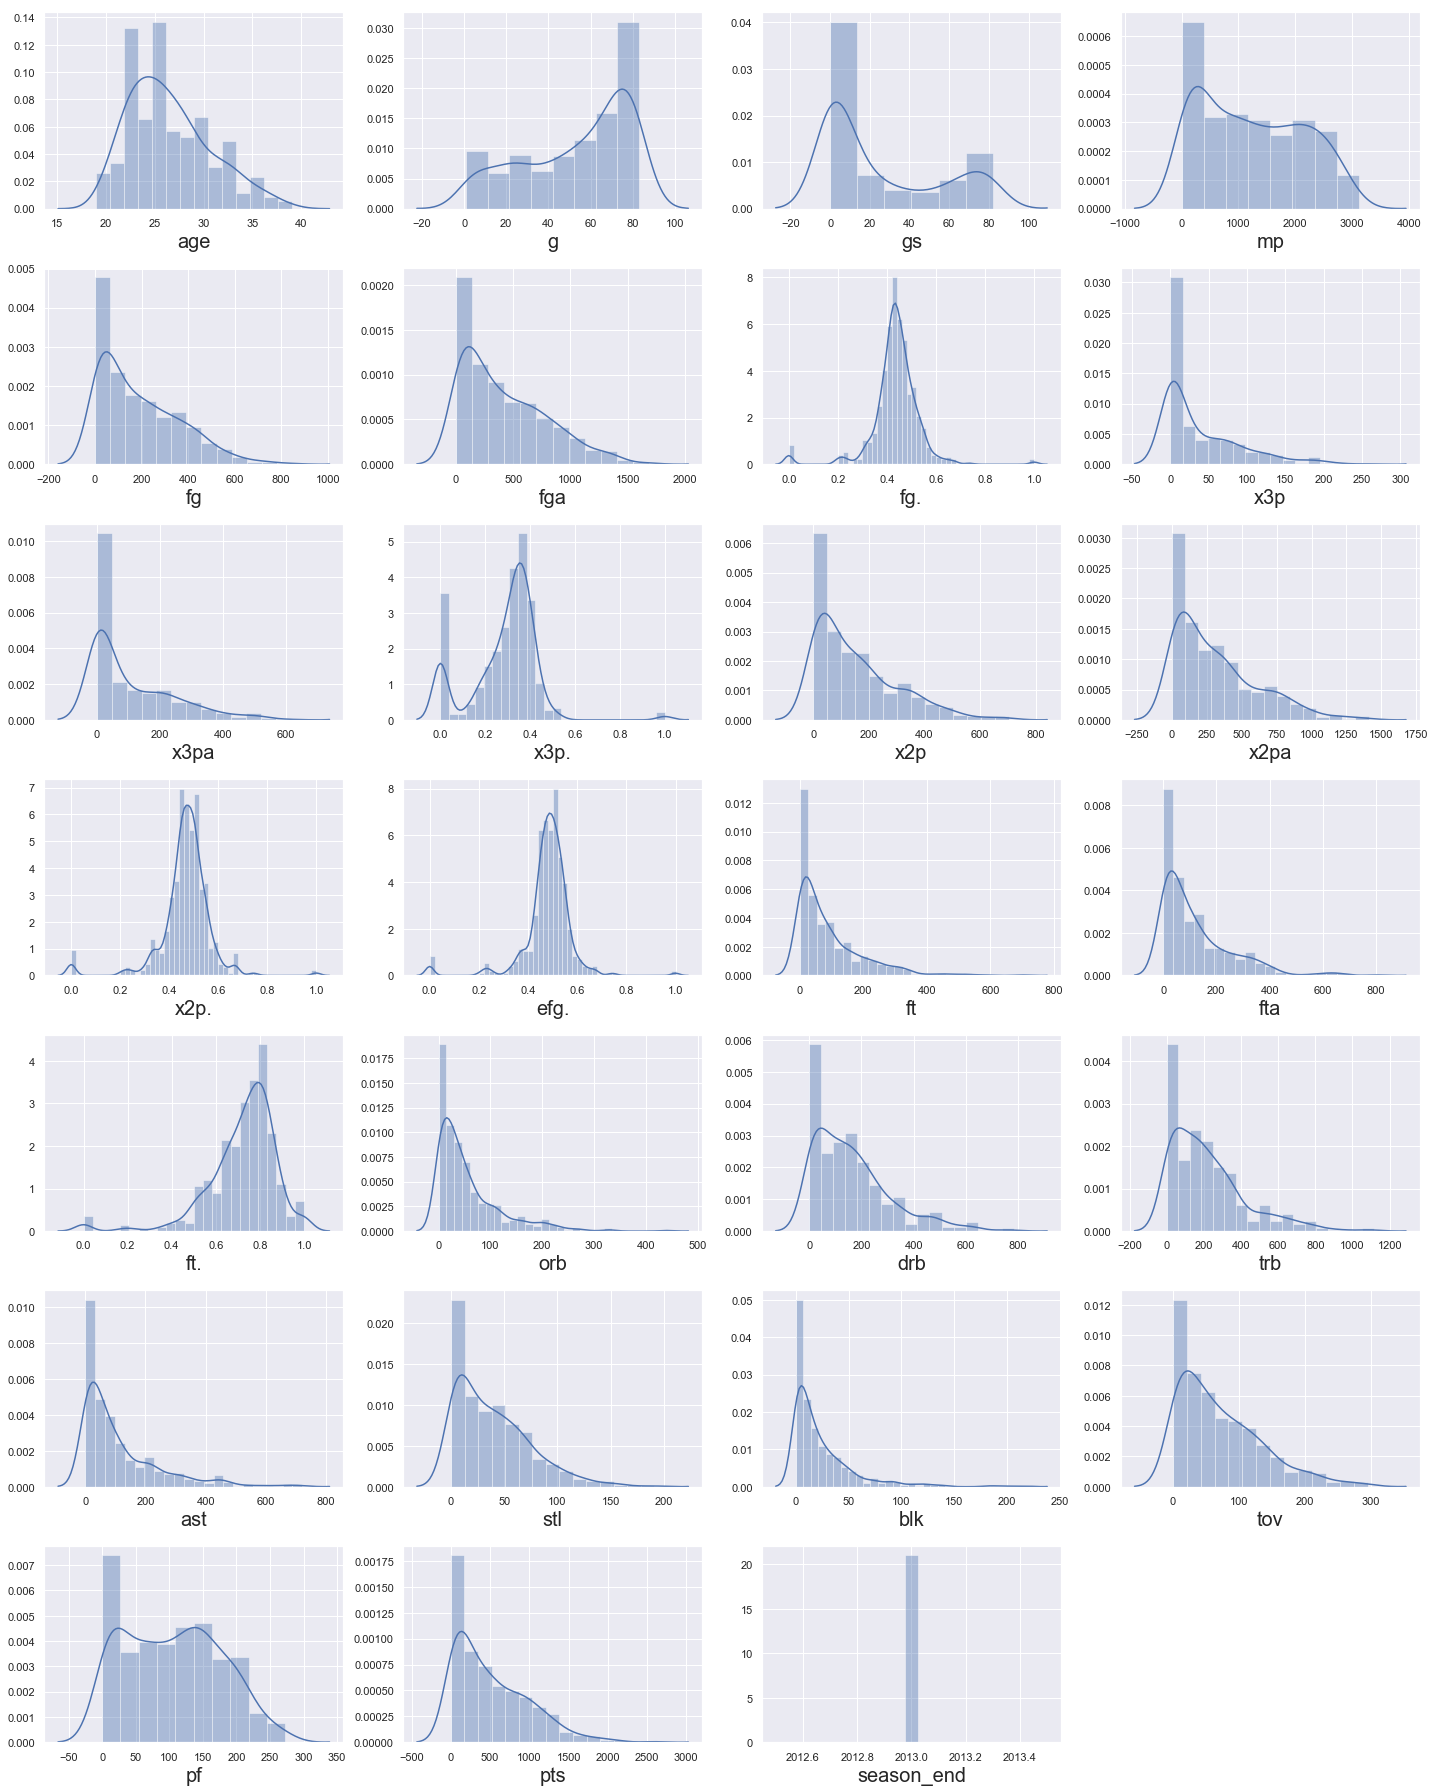

In [19]:
plt.figure(figsize=(20,25))

plotnum = 1

for col in nba:
    
    if plotnum < 28 and col not in categorical_col:
        ax = plt.subplot(7,4,plotnum)
        sns.distplot(nba[col])
        plt.xlabel(col,fontsize=20)
    
    if col not in categorical_col:
        plotnum+=1
plt.tight_layout()
plt.show()

`Observaton:`

* All the distributions looks normal which have little right skewness.

Let's check the collinearity in our features:

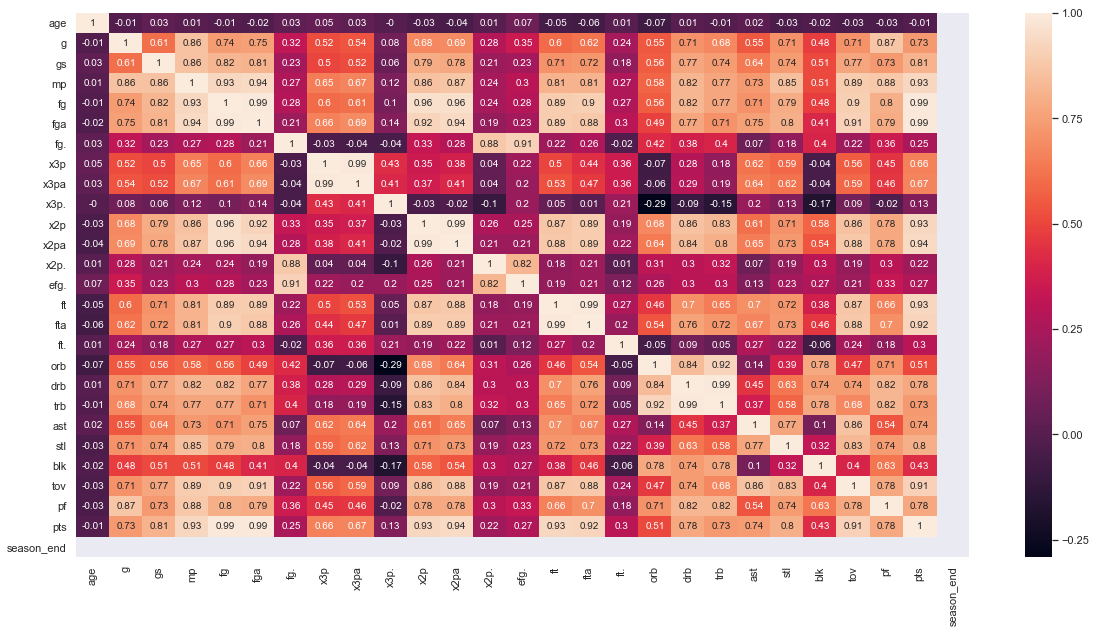

In [20]:
#We can also use correlation matrix here using heatmap:

correlation_matrix = nba.corr().round(2)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True)
# annot = True to print the values inside the square

`Observaton:`

* Our target column(pts) is most correlated to fga, fg, x2pa, fta, tbv, gs, stl, pf columns
* So, we can't really rule any column out of picture.
* There're several columns are too correlated. But we'll handle them using PCA

#### Data Transformation:

`Applying ordinal encoding for categorical features`

In [21]:
nba[categorical_col].head()

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014


In [22]:
nba['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [23]:
nba['bref_team_id'].unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

let's encode only the pos column and drop other columns as they don't contribute in predicting points

In [24]:
data = nba.drop(['player','bref_team_id','season'], axis=1)

In [25]:
data.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,SF,23,63,0,847,66,141,0.468,4,15,...,72,144,216,28,23,26,30,122,171,2013
1,C,20,81,20,1197,93,185,0.503,0,0,...,142,190,332,43,40,57,71,203,265,2013
2,PF,27,53,12,961,143,275,0.520,0,0,...,102,204,306,38,24,36,39,108,362,2013
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,32,230,262,248,35,3,146,136,1330,2013
4,C,25,56,30,951,136,249,0.546,0,1,...,94,183,277,40,23,46,63,187,328,2013


Let's drop season_end column too

In [26]:
data = data.drop(['season_end'], axis = 1)

In [27]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pandas.Categorical(data[feature]).codes # Replace strings with an integer

In [28]:
data.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,5,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,0,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,3,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,6,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,0,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [29]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = np.array(data['pos']).reshape(len(np.array(data['pos'])), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [30]:
onehot_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [31]:
onehot_encoded.shape

(481, 7)

In [32]:
encoded = pandas.DataFrame(onehot_encoded, columns = ['one_1','one_2','one_3','one_4','one_5','one_6','one_7'])

In [33]:
encoded.head()

,one_1,one_2,one_3,one_4,one_5,one_6,one_7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data_final = pandas.concat([data,encoded], axis =1)

In [35]:
data_final.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,tov,pf,pts,one_1,one_2,one_3,one_4,one_5,one_6,one_7
0,5,23,63,0,847,66,141,0.468,4,15,...,30,122,171,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,20,81,20,1197,93,185,0.503,0,0,...,71,203,265,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,27,53,12,961,143,275,0.520,0,0,...,39,108,362,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6,28,73,73,2552,464,1011,0.459,128,300,...,146,136,1330,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,25,56,30,951,136,249,0.546,0,1,...,63,187,328,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data_final.drop('pos', axis = 1, inplace=True)

In [37]:
data_final.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,tov,pf,pts,one_1,one_2,one_3,one_4,one_5,one_6,one_7
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,30,122,171,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,81,20,1197,93,185,0.503,0,0,0.403191,...,71,203,265,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,53,12,961,143,275,0.520,0,0,0.395562,...,39,108,362,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,146,136,1330,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,63,187,328,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
targets = data_final.pop('pts')

In [39]:
targets.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

In [40]:
data_final.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,one_1,one_2,one_3,one_4,one_5,one_6,one_7
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,81,20,1197,93,185,0.503,0,0,0.403191,...,57,71,203,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,53,12,961,143,275,0.520,0,0,0.395562,...,36,39,108,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data_scaled = scalar.fit_transform(data_final)
data_scaled

array([[-0.83677633,  0.3852869 , -0.86310432, ..., -0.46329954,
         1.96432835, -0.54130468],
       [-1.55210112,  1.09685132, -0.1880585 , ..., -0.46329954,
        -0.50907986, -0.54130468],
       [ 0.11699006, -0.01002666, -0.45807683, ..., -0.46329954,
        -0.50907986, -0.54130468],
       ...,
       [-0.35989314,  1.01778861,  1.76957436, ..., -0.46329954,
        -0.50907986, -0.54130468],
       [-1.31365952,  1.13638268, -0.76184744, ..., -0.46329954,
        -0.50907986, -0.54130468],
       [-0.59833473,  0.6620064 , -0.5593337 , ..., -0.46329954,
        -0.50907986, -0.54130468]])

### PCA

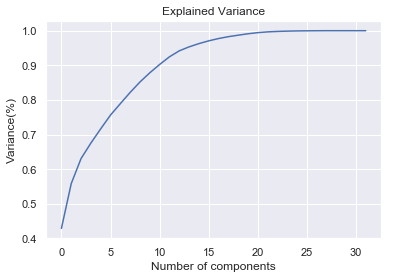

In [42]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(data_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance(%)")
plt.title("Explained Variance")
plt.show()

Using 15 components we can explain more than 95% of the variance. 

So instead of giving all  30 columns as input in our algorithm let's use these 15 principal components instead.

In [43]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(data_scaled)

principal_x = pandas.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])

In [44]:
principal_x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15
0,-1.722703,1.055030,0.384767,-1.415929,-1.518430,-0.516324,-0.749003,0.327776,0.696692,0.067501,-0.049986,-0.586352,-0.738659,0.680025,-0.227608
1,0.287548,2.721383,0.080232,0.212382,-0.287822,-1.655530,-0.979457,-0.326793,-0.086575,1.885222,1.108920,0.159264,0.107012,1.167228,0.498164
2,-0.474103,2.054199,0.415786,-0.276508,0.340659,2.075100,-0.524704,0.060305,0.103820,0.596625,0.140761,0.651476,-0.267300,0.314684,0.082159
3,4.314889,-2.513483,0.774372,-0.314115,1.976869,-0.440346,0.429468,-0.376983,0.017888,-0.856123,-0.263404,1.057740,0.363652,-0.090917,-0.308717
4,-0.150620,3.045610,0.410298,0.839473,0.050611,-1.507891,0.428078,0.444654,-0.217637,0.372306,-0.536754,-1.408189,0.788508,-0.086151,0.303641


#### Model Preparation:

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor

In [49]:
x_train,x_test,y_train,y_test = train_test_split(principal_x, targets, test_size = 0.2, random_state = 42)

In [50]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [51]:
knn.score(x_test, y_test)

0.9659888333489838

Without hyperparameter tuning, we're getting great accuracy. Let's improve it by tuning.

#### Hyperparameter Tuning:

In [52]:
param_grid = { 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [53]:
grid_search1 = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 5, verbose= 3)

In [54]:
grid_search1.fit(x_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.9574039746557309, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.9492028678460178, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.9515785503363118, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.9276626325418599, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.951559010591483, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=18, n_neighbors=7, score=0.9252822238571565, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=7, score=0.9471804968130138, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=9, score=0.9479489057541536, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=9, score=0.941132831216394, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=9, score=0.9316542413062365, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=9, score=0.9302716088531636, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_si

[CV]  algorithm=auto, leaf_size=20, n_neighbors=12, score=0.9407492797608681, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=12, score=0.9273114389463026, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=12, score=0.9269639742915383, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=12, score=0.9336791905048689, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=12, score=0.9463193862012893, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=auto, leaf_size=20, n_neighbors=13 ....................
[CV]  algorithm=auto, 

[CV]  algorithm=auto, leaf_size=27, n_neighbors=3, score=0.9574039746557309, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=3, score=0.9492028678460178, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=3, score=0.9515785503363118, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=3, score=0.9276626325418599, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=3, score=0.951559010591483, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=27, n_neighbors=5, score=0.9542054684382731, total=   0.0s
[CV] algorithm=auto, leaf_size=27, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_si

[CV]  algorithm=auto, leaf_size=30, n_neighbors=10, score=0.9320280982205357, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=10, score=0.9281027838320158, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=10, score=0.9481099647960781, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=11, score=0.9432745763578927, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=11, score=0.931044830018553, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=11 ....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=11, score=0.9303125823202367, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=11 ....................
[CV]  algorithm=auto, l

[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.9336791905048689, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.9463193862012893, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=13, score=0.922777698007285, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=13, score=0.9235810780454186, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=13, score=0.9331860586428071, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, l

[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.9519675607633005, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.9247236358208052, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.949356253450048, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.9583329385835228, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.943321214195776, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.9439841079131464, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................


[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.9316542413062365, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.9302716088531636, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.9461007333787503, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.9465866053832422, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.934825109316096, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.9320280982205357, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ............

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.9463193862012893, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.922777698007285, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.9235810780454186, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.9331860586428071, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.9454899165402744, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ..........

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.9519675607633005, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.9247236358208052, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.949356253450048, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.9583329385835228, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.943321214195776, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.9439841079131464, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................


[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.9313381681949959, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.9473059556557796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.9407492797608681, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.9273114389463026, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.9269639742915383, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.9336791905048689, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ........

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.9395513309437908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.9519675607633005, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.9247236358208052, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.949356253450048, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.9583329385835228, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.943321214195776, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algori

[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=12, score=0.9336791905048689, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=12, score=0.9463193862012893, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.922777698007285, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.9235810780454186, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.9331860586428071, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.9395513309437908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.9519675607633005, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.9247236358208052, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.949356253450048, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.9583329385835228, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.943321214195776, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algori

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.9320280982205357, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.9281027838320158, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.9481099647960781, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.9432745763578927, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.931044830018553, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.9303125823202367, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV] 

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.922777698007285, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.9235810780454186, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.9331860586428071, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.9454899165402744, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.9574039746557309, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  

[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.9320280982205357, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.9281027838320158, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.9481099647960781, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.9432745763578927, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.931044830018553, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.9303125823202367, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=b

[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.9252822238571565, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.9471804968130138, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.9479489057541536, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.941132831216394, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.9316542413062365, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.9302716088531636, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.9454899165402744, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9574039746557309, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9492028678460178, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9515785503363118, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9276626325418599, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.951559010591483, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute,

[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.9407492797608681, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.9273114389463026, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.9269639742915383, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.9336791905048689, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.9463193862012893, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.9392391791881863, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:   12.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [18, 20, 25, 27, 30, 32, 34], 'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [55]:
grid_search1.best_params_

{'algorithm': 'auto', 'leaf_size': 18, 'n_neighbors': 3}

In [56]:
grid_search1.best_score_

0.9474707884354338

In [76]:
knn_new = KNeighborsRegressor(algorithm = 'auto', leaf_size = 18, n_neighbors = 5)
knn_new.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=18, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [77]:
knn_new.score(x_test, y_test)

0.9659888333489838

By hit and trial and Grid search combined, we are getting almost same accuracy on our dataset.

So, our final model is giving an accuracy of 96.6% which is pretty good.

# Done !